In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.11.0'

In [5]:
!pip install opencv-python

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import utils
from keras.utils import np_utils
import keras
from keras.datasets import mnist

In [8]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
y_train[0]

5

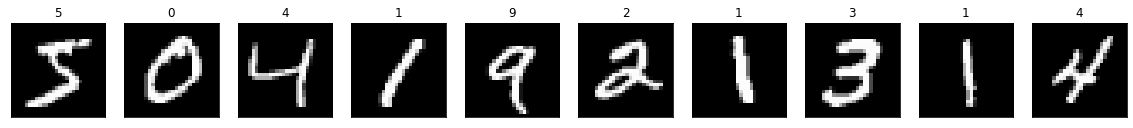

In [10]:
fig,axes=plt.subplots(ncols=10,sharex=False,
                     sharey=True,figsize=(20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()    

In [11]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /=255
x_test /=255

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 100)               540900    
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

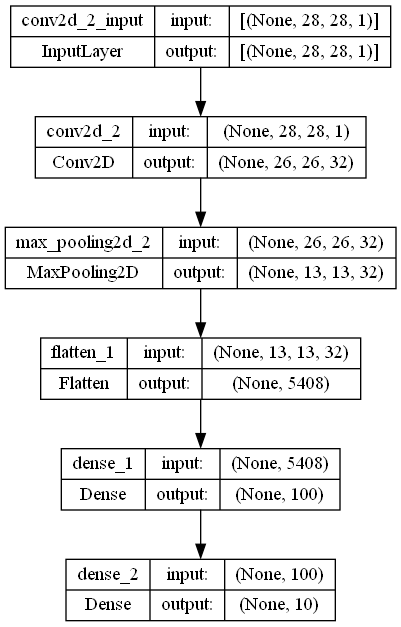

In [20]:
utils.plot_model(model,show_shapes=True)

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(x_train,y_train,batch_size=32,epochs=3,verbose=1,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1380 - accuracy: 0.9569 - val_loss: 0.0664 - val_accuracy: 0.9798
Epoch 2/3
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0617 - val_accuracy: 0.9789
Epoch 3/3
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0291 - accuracy: 0.9908 - val_loss: 0.0432 - val_accuracy: 0.9856


In [23]:
model.save('mnist_cnn_model.h5')

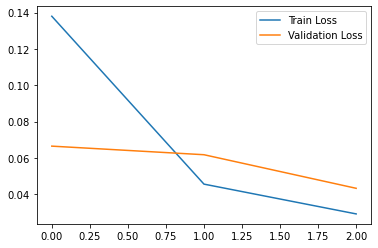

In [24]:
plt.plot(model.history.history['loss'],label='Train Loss')
plt.plot(model.history.history['val_loss'],label='Validation Loss')
plt.legend()

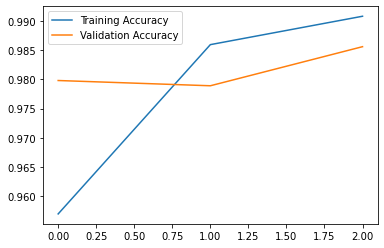

In [25]:
plt.plot(model.history.history['accuracy'],label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()

In [26]:
model=keras.models.load_model('mnist_cnn_model.h5')

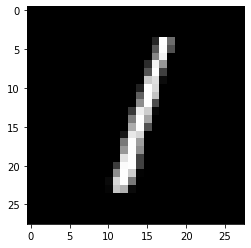

In [27]:
plt.imshow(x_test[2],cmap='gray')

In [28]:
x=np.reshape(x_test[2],(1,28,28,1))

np.argmax(model.predict(x))

1/1 [==============================] - 0s 107ms/step


1

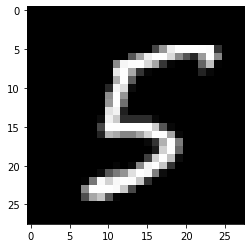

In [29]:
plt.imshow(x_test[23],cmap='gray')

In [30]:
x=np.reshape(x_test[23],(1,28,28,1))

np.argmax(model.predict(x))

1/1 [==============================] - 0s 21ms/step


5

In [31]:
model.predict(x)

1/1 [==============================] - 0s 23ms/step


array([[1.2087145e-10, 1.0383480e-11, 1.3605290e-11, 4.7253197e-06,
        2.2042410e-11, 9.9999499e-01, 4.8651543e-08, 2.4694606e-12,
        5.5997131e-09, 1.8416458e-07]], dtype=float32)